In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')
from utils.data import get_betamap_paths, load_participant_list

In [2]:
base_dir = '/home/ubuntu/data/learning-habits'
sub_ids = load_participant_list(base_dir)
sub_ids.remove('04')
sub_ids.remove('45')

In [3]:
run = 'test'
reference_model = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/both_modulators_exclude_mask_20250206'
no_duration_model = '/home/ubuntu/data/learning-habits/bids_dataset/derivatives/nilearn/null_durations_20250211'

# Load design matrices

In [8]:
DMs[0].columns

Index(['first_stim_presentation_exclude', 'first_stim_value_rl',
       'first_stim_value_ck', 'first_stim_presentation_include', 'iti',
       'non_response_feedback', 'purple_frame', 'response',
       'second_stim_presentation', 'csf', 'rot_x', 'rot_y', 'rot_z', 'trans_x',
       'trans_y', 'trans_z', 'white_matter', 'cosine00', 'cosine01',
       'cosine02', 'cosine03', 'cosine04', 'physio1', 'physio2', 'physio3',
       'physio4', 'physio5', 'physio6', 'physio7', 'physio8', 'physio9',
       'physio10', 'physio11', 'physio12', 'physio13', 'physio14', 'physio15',
       'physio16', 'physio17', 'physio18', 'scrub_vol_16', 'scrub_vol_18',
       'scrub_vol_21', 'scrub_vol_22', 'scrub_vol_29', 'scrub_vol_30',
       'scrub_vol_40', 'scrub_vol_41', 'scrub_vol_42', 'scrub_vol_44',
       'scrub_vol_45', 'scrub_vol_52', 'scrub_vol_53', 'scrub_vol_194',
       'scrub_vol_201', 'scrub_vol_202', 'scrub_vol_217', 'scrub_vol_218',
       'scrub_vol_227', 'scrub_vol_228', 'scrub_vol_271', 'scr

In [4]:
DM_paths , _ = get_betamap_paths(sub_ids, reference_model, run, "sub-{sub_id}_run-{run}_design_matrix.csv")
DM_paths.sort()
DMs = [pd.read_csv(path) for path in DM_paths]

In [25]:
DM_paths_p , _ = get_betamap_paths(sub_ids, no_duration_model, run, "sub-{sub_id}_run-{run}_design_matrix.csv")
DM_paths_p.sort()
DMs_p = [pd.read_csv(path) for path in DM_paths_p]

In [26]:
# Ensure all design matrices have the same columns in the same order
common_columns = [col for col in DMs[0].columns if col in set.intersection(*(set(dm.columns[:15]) for dm in DMs))]
aligned_DMs = [dm[common_columns] for dm in DMs]

# Compute the average correlation matrix
average_correlation_matrix = np.mean([dm.corr().values for dm in aligned_DMs], axis=0)

# Ensure all design matrices without duration have the same columns in the same order
common_columns_p = [col for col in DMs_p[0].columns if col in set.intersection(*(set(dm.columns[:15]) for dm in DMs_p))]
aligned_DMs_p = [dm[common_columns_p] for dm in DMs_p]

# Compute the average correlation matrix for design matrices without duration
average_correlation_matrix_p = np.mean([dm.corr().values for dm in aligned_DMs_p], axis=0)

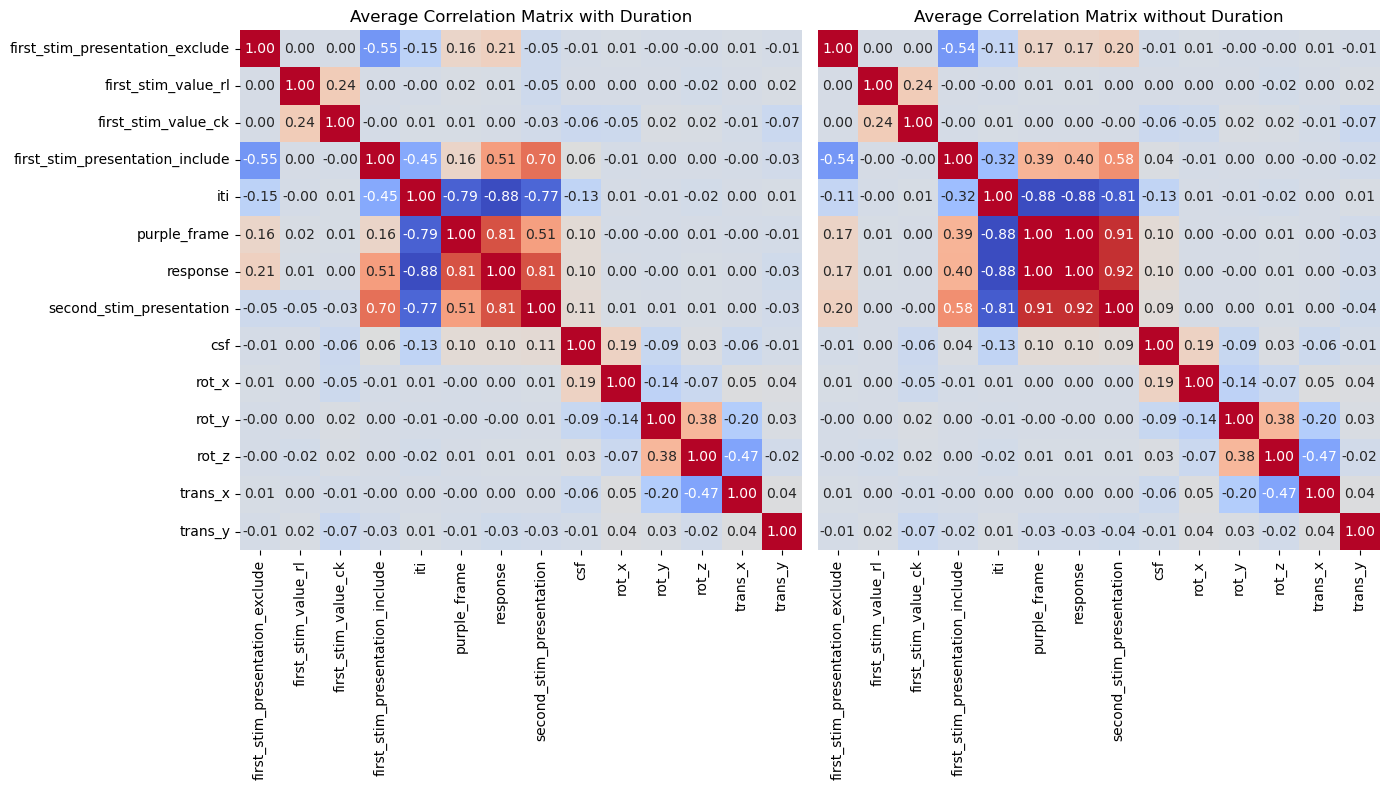

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(average_correlation_matrix, xticklabels=common_columns, 
            yticklabels=common_columns, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Average Correlation Matrix with Duration')

sns.heatmap(average_correlation_matrix_p, xticklabels=common_columns_p,
            yticklabels=False, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1], cbar=False)
axes[1].set_title('Average Correlation Matrix without Duration')

plt.tight_layout()
plt.show() 

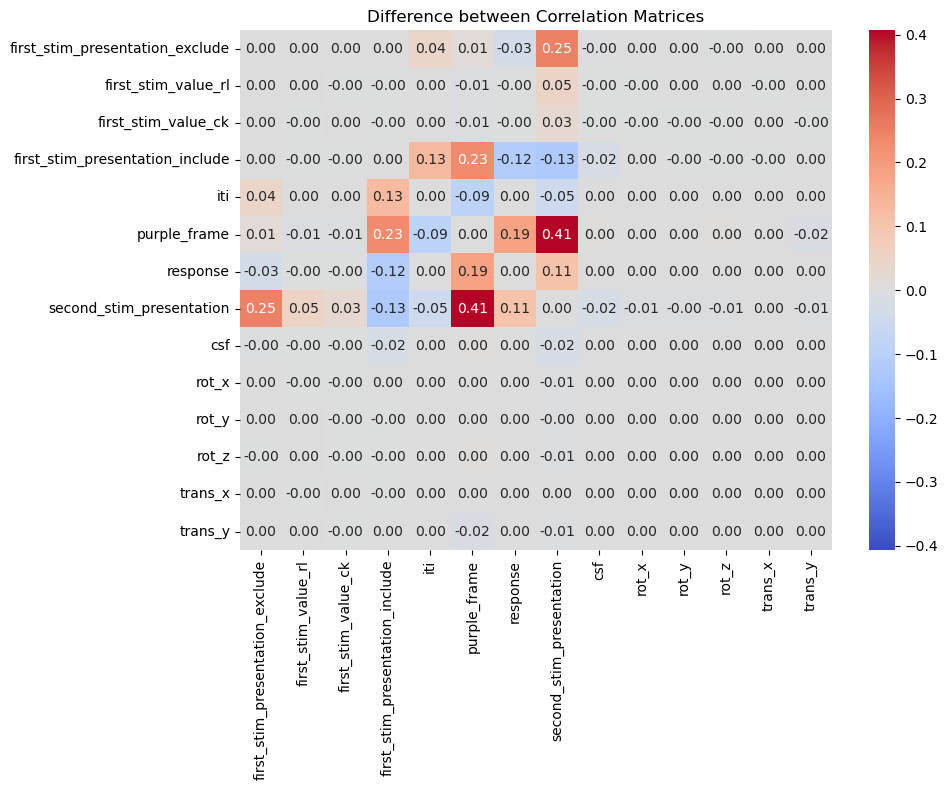

In [43]:
# Compute the difference between the two average correlation matrices
difference_matrix = average_correlation_matrix_p - average_correlation_matrix

# Plot the difference matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(difference_matrix, xticklabels=common_columns, 
            yticklabels=common_columns, cmap='coolwarm', annot=True, fmt=".2f", ax=ax,
            vmin=-np.max(np.abs(difference_matrix)), vmax=np.max(np.abs(difference_matrix)))
ax.set_title('Difference between Correlation Matrices')

plt.tight_layout()
plt.show()

In [7]:
threshold = .6
average_correlation_df = pd.DataFrame(average_correlation_matrix, 
									  columns=aligned_DMs[0].columns, 
									  index=aligned_DMs[0].columns)
high_corr_pairs = np.abs(average_correlation_df).unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1.0]  # Remove self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("Highly correlated columns:", high_corr_pairs)

Highly correlated columns: response                         iti                                0.883004
iti                              response                           0.883004
purple_frame                     response                           0.813226
response                         purple_frame                       0.813226
                                 second_stim_presentation           0.810004
second_stim_presentation         response                           0.810004
purple_frame                     iti                                0.793128
iti                              purple_frame                       0.793128
second_stim_presentation         iti                                0.766718
iti                              second_stim_presentation           0.766718
first_stim_presentation_include  second_stim_presentation           0.704733
second_stim_presentation         first_stim_presentation_include    0.704733
csf                              white_matter    